Importing the Libraries

### 📦 Importing Required Libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt       # plotting
import numpy as np                    # Linear algebra
import os                             # accessing directory structure
import pandas as pd                   # data processing, CSV file I/O (e.g. pd.read_csv)

# Import the libraries
import numpy as np                    # Linear algebra
import pandas as pd                   # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    f1_score,
    make_scorer,
    accuracy_score,
    recall_score,
    precision_score,
)
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import random

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter)
# will list all files under the input directory

### 🔗 Mounting Google Drive to Access Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Replace 'your_dataset_path_in_drive.csv' with the actual path to your dataset file
dataset_path = '/content/drive/MyDrive/Project Dataset/animal_health_data_detailed.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe
display(df.head())

Mounted at /content/drive


,AnimalName,BloodBrainDisease,AppearenceDisease,GeneralDisease,LungDisease,AbdominalDisease,HealthStatus
0,Pig,seizures,ruffled feathers,loss of appetite,halitosis,ulcers,Stable
1,Lion,seizures,alopecia,loss of appetite,halitosis,fetopelvic disproportion,Critical
2,Duck,wasting,emaciation,loss of appetite,nasal discharge,diarrhea,Recovered
3,Buffaloes,hemorrhage,swelling,loss of appetite,halitosis,diarrhea,Stable
4,Duck,convulsions,hairloss,pains,nasal discharge,colic,Critical


### 🧾 Dataset Info Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AnimalName         867 non-null    object
 1   BloodBrainDisease  867 non-null    object
 2   AppearenceDisease  867 non-null    object
 3   GeneralDisease     867 non-null    object
 4   LungDisease        867 non-null    object
 5   AbdominalDisease   867 non-null    object
 6   HealthStatus       867 non-null    object
dtypes: object(7)
memory usage: 47.5+ KB


### 📐 Dataset Dimensions

In [ ]:
df.shape

(867, 7)

### 📊 Descriptive Statistics

In [ ]:
df.describe()

,AnimalName,BloodBrainDisease,AppearenceDisease,GeneralDisease,LungDisease,AbdominalDisease,HealthStatus
count,867,867,867,867,867,867,867
unique,13,6,6,5,5,5,3
top,Duck,wasting,swelling,pains,dyspnea,diarrhea,Stable
freq,85,156,153,180,185,178,307


### ❓ Checking for Missing Values

In [ ]:
df.isnull().sum()

,0
AnimalName,0
BloodBrainDisease,0
AppearenceDisease,0
GeneralDisease,0
LungDisease,0
AbdominalDisease,0
HealthStatus,0


### 🔢 Checking Unique Values in Each Column

In [ ]:
df.nunique()

,0
AnimalName,13
BloodBrainDisease,6
AppearenceDisease,6
GeneralDisease,5
LungDisease,5
AbdominalDisease,5
HealthStatus,3


### 🐾 Animal Name Distribution Visualization

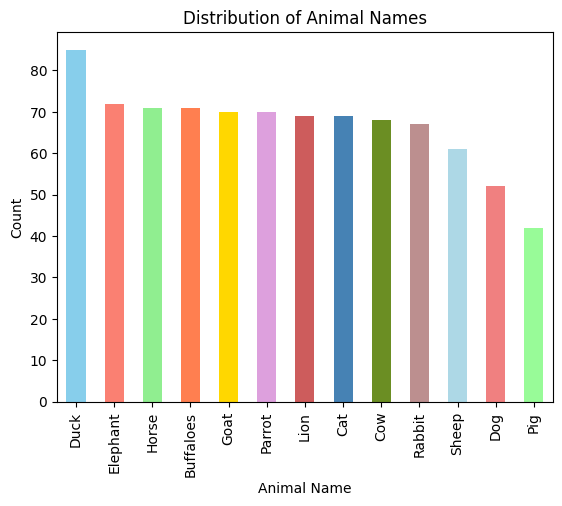

In [ ]:
df['AnimalName'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'coral', 'gold', 'plum', 'indianred', 'steelblue', 'olivedrab', 'rosybrown', 'lightblue', 'lightcoral', 'palegreen'])
plt.xlabel('Animal Name')
plt.ylabel('Count')
plt.title('Distribution of Animal Names')
plt.show()

### 🧠 Blood-Brain Disease Distribution Pie Chart

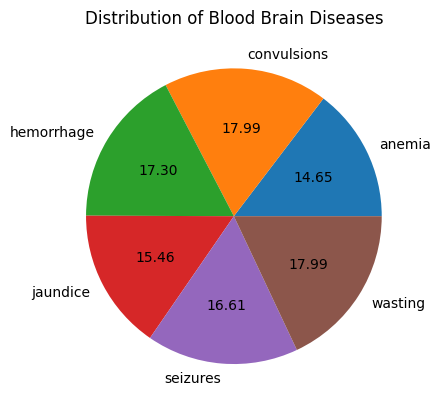

In [ ]:
df.groupby('BloodBrainDisease').size().plot(kind='pie', autopct='%.2f')
plt.ylabel('') # Remove the default y-label for pie chart
plt.title('Distribution of Blood Brain Diseases')
plt.show()

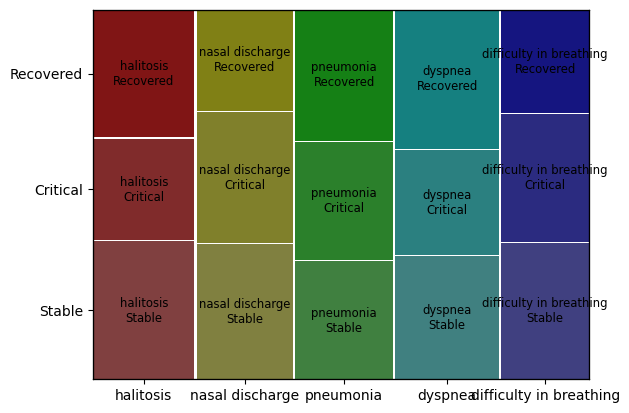

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['LungDisease','HealthStatus' ])
plt.show()

### 🌡️ Heatmap of Feature Correlations

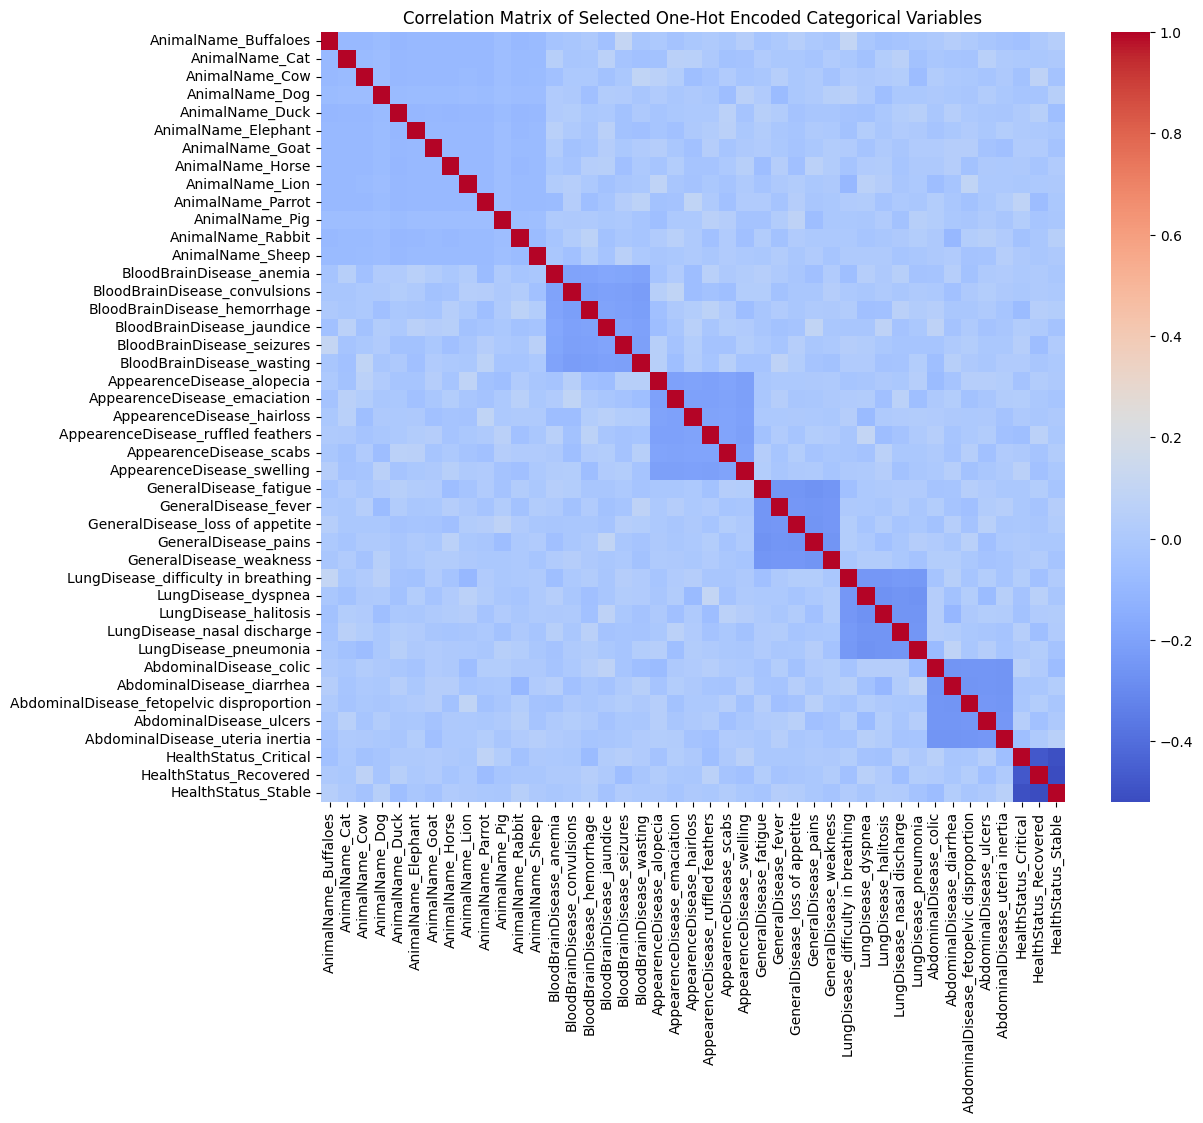

In [ ]:
# Select only the specified categorical columns
selected_columns = ['AnimalName', 'BloodBrainDisease', 'AppearenceDisease', 'GeneralDisease', 'LungDisease', 'AbdominalDisease', 'HealthStatus']
categorical_df_selected = df[selected_columns]

# Apply one-hot encoding to the selected categorical columns
encoded_df_selected = pd.get_dummies(categorical_df_selected)

# Calculate the correlation matrix of the encoded data
correlation_matrix_selected = encoded_df_selected.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Selected One-Hot Encoded Categorical Variables')
plt.show()

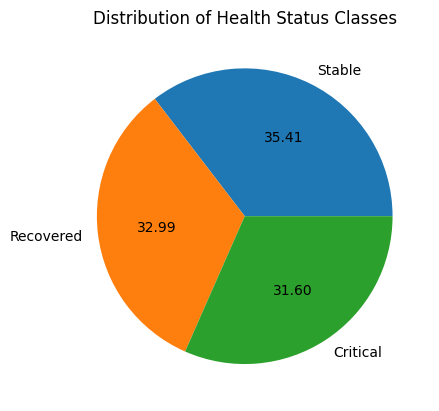


Could not display label mapping. Please ensure the cell performing Label Encoding (where 'le' is defined) has been run.


In [ ]:
# Calculate the value counts for all classes in the 'HealthStatus' column
class_division = df['HealthStatus'].value_counts()

# Plot the pie chart using the value counts
plt.pie(class_division, labels=class_division.index, autopct='%.2f')
plt.title('Distribution of Health Status Classes')
plt.show()

# Get the mapping of encoded labels back to original health statuses from the label encoder
# Assuming 'le' object from the previous label encoding step is available
try:
    label_mapping = dict(zip(le.transform(le.classes_), le.classes_))

    print("Explanation of the Health Status Pie Chart:")
    print("The pie chart displays the distribution of animal health statuses.")
    print("The health statuses were converted to numerical labels for analysis.")
    print("\nMapping of Numerical Labels to Original Health Statuses:")
    for encoded_value, original_status in label_mapping.items():
        print(f"  {encoded_value}: {original_status}")

    print("\nThe percentages shown on the chart indicate the proportion of animals in each health status category.")

except NameError:
    print("\nCould not display label mapping. Please ensure the cell performing Label Encoding (where 'le' is defined) has been run.")

### 📦 Importing Required Libraries

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['AnimalName']=le.fit_transform(df['AnimalName'])

df['BloodBrainDisease' ]=le.fit_transform(df['BloodBrainDisease' ])
df['AppearenceDisease' ]=le. fit_transform(df['AppearenceDisease' ])
df['GeneralDisease']=le.fit_transform(df['GeneralDisease' ])
df['LungDisease' ]=le.fit_transform(df['LungDisease'])
df['AbdominalDisease' ]=le.fit_transform(df['AbdominalDisease'])
df['HealthStatus' ]=le.fit_transform(df['HealthStatus'])

In [ ]:
df

,AnimalName,BloodBrainDisease,AppearenceDisease,GeneralDisease,LungDisease,AbdominalDisease,HealthStatus
0,10,4,3,2,2,3,2
1,8,4,0,2,2,2,0
2,4,5,1,2,3,1,1
3,0,2,5,2,2,1,2
4,4,1,2,3,3,0,0
...,...,...,...,...,...,...,...
862,10,1,3,1,1,0,0
863,0,1,3,1,1,0,1
864,11,1,1,0,3,2,0
865,3,2,5,2,2,3,0


### 📦 Importing Required Libraries

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'HealthStatus' is your target variable and the rest are features
X = df.drop('HealthStatus', axis=1)
y = df['HealthStatus']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now apply SMOTE to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
xbal, ybal = smote.fit_resample(xtrain, ytrain)

# Display the value counts of the balanced target variable
display(ybal.value_counts())

,count
HealthStatus,
0,245
2,245
1,245


### 📦 Importing Required Libraries

In [ ]:
x = df.drop(['HealthStatus' ], axis=1)
y = df ['HealthStatus' ]

from sklearn.preprocessing import StandardScaler
stx= StandardScaler()
X = stx.fit_transform(x)

### 📦 Importing Required Libraries

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest=train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Calculate and print the proportion of each class in the training set
train_class_proportions = ytrain.value_counts(normalize=True) * 100
print("Proportion of each class in the training set:")
print(train_class_proportions)

# Calculate and print the proportion of each class in the testing set
test_class_proportions = ytest.value_counts(normalize=True) * 100
print("\nProportion of each class in the testing set:")
print(test_class_proportions)

# Identify the minority class and its proportion in the training set
minority_class_train = train_class_proportions.idxmin()
minority_proportion_train = train_class_proportions.min()
print(f"\nMinority Class in train set: {minority_class_train} ({minority_proportion_train:.2f}%)")

# Identify the minority class and its proportion in the testing set
minority_class_test = test_class_proportions.idxmin()
minority_proportion_test = test_class_proportions.min()
print(f"Minority Class in test set: {minority_class_test} ({minority_proportion_test:.2f}%)")

Proportion of each class in the training set:
HealthStatus
2    35.478548
1    33.003300
0    31.518152
Name: proportion, dtype: float64

Proportion of each class in the testing set:
HealthStatus
2    35.249042
1    32.950192
0    31.800766
Name: proportion, dtype: float64

Minority Class in train set: 0 (31.52%)
Minority Class in test set: 0 (31.80%)


### 📦 Importing Required Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(xbal,ybal)

LogisticRegression()

### 📉 Model Performance Plot

In [ ]:
ytestpred=lr.predict(xtest)
ytrainpred=lr.predict(xtrain)

print(accuracy_score(ytest, ytestpred))
print(accuracy_score(ytrain, ytrainpred))

0.32950191570881227
0.33003300330033003


### 📦 Importing Required Libraries

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(xbal, ybal)

KNeighborsClassifier()

### 📉 Model Performance Plot

In [ ]:
ytestpredk=knn.predict(xtest)
ytrainpredk=knn.predict(xtrain)

print(accuracy_score(ytest, ytestpredk))
print(accuracy_score(ytrain, ytrainpredk))

0.3218390804597701
0.3102310231023102


### 📦 Importing Required Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

dtc.fit(xbal,ybal)

DecisionTreeClassifier()

### 📉 Model Performance Plot

In [ ]:
ytestpredc=dtc.predict(xtest)
ytrainpredc=dtc.predict(xtrain)

print(accuracy_score(ytest, ytestpredc))
print(accuracy_score(ytrain, ytrainpredc))

0.32950191570881227
0.33003300330033003


### 📦 Importing Required Libraries

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xbal,ybal)

RandomForestClassifier()

### 📉 Model Performance Plot

In [ ]:
ytestpredr=rfc.predict(xtest)
ytrainpredr=rfc.predict(xtrain)

print(accuracy_score(ytest, ytestpredr))
print(accuracy_score(ytrain, ytrainpredr))

0.3486590038314176
0.3415841584158416


### 📉 Model Performance Plot

In [ ]:
# Calculate accuracy scores for each model
acc_lr = accuracy_score(ytest, ytestpred)
acc_knn = accuracy_score(ytest, ytestpredk)
acc_dt = accuracy_score(ytest, ytestpredc)
acc_rfc = accuracy_score(ytest, ytestpredr)

# Create a DataFrame to display the accuracy scores
accuracy_df = pd.DataFrame({
    'model': ['logistic regression', 'k-nearest neighbour', 'decision tree', 'random forest'],
    'Accuracy': [acc_lr * 100, acc_knn * 100, acc_dt * 100, acc_rfc * 100]
})

print(accuracy_df)

                 model   Accuracy
0  logistic regression  32.950192
1  k-nearest neighbour  32.183908
2        decision tree  32.950192
3        random forest  34.865900


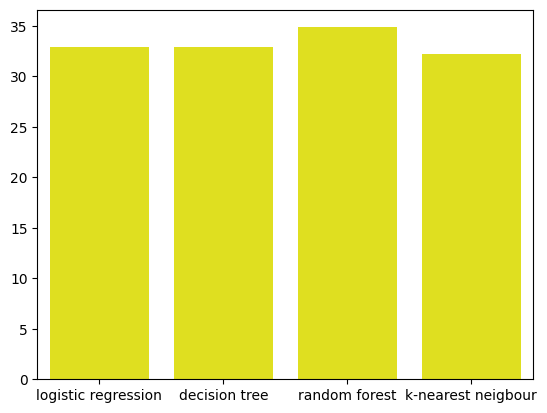

In [ ]:
models=['logistic regression', 'decision tree','random forest', 'k-nearest neigbour']
accuracy=[acc_lr*100, acc_dt*100, acc_rfc*100, acc_knn*100]
sns.barplot(x=models,y=accuracy, color='Yellow')
plt.show()

In [ ]:
import pickle
pickle.dump(rfc,open("rfc.pkl","wb"))

In [ ]:
print(rfc.predict([[4,3,2,6,4,5]]))

[0]


### 🤖 Model Training

In [ ]:
from flask import Flask, request, render_template

app = Flask(__name__)
model = pickle.load(open(r'rfc.pkl', 'rb'))
#scale = pickle.load(open(r'scale1.pkl','rb'))

@app.route('/') # rendering the html template
def home():
  return render_template('index.html')

In [ ]:
@app.route('/predict',methods=["POST","GET"]) # rendering the html template
def predict() :
    # This route could potentially handle form submissions or data processing before rendering the result
    # For now, it seems to be intended to render 'inner-page.html' - I will keep this as is based on your code
    return render_template("inner-page.html")

@app.route('/submit',methods=["POST","GET"])# route to show the predictions in a web UI
def submit():
    # reading the inputs given by the user
    input_feature=[int(x) for x in request.form.values() ]
    #input_feature = np.transpose(input_feature)
    input_feature=[np.array(input_feature)]
    print(input_feature)
    names = ['AnimalName', 'BloodBrainDisease', 'AppearenceDisease',
    'GeneralDisease', 'LungDisease', 'AbdominalDisease']
    data = pd.DataFrame(input_feature, columns=names)
    print(data)

    #data_scaled = scale.fit_transform(data)
    #data = pandas.DataFrame(, columns=names)

    # predictions using the loaded model file
    prediction=model.predict(data)
    print(prediction)
    prediction = int(prediction)
    print(type(prediction))

    if (prediction == 0):
        # Pass the message as the 'result' variable to output.html
        return render_template("output.html",result ="According to our study we feel sad")
    else:
        # Pass the message as the 'result' variable to output.html
        return render_template("output.html",result = "You are health is in normal condition")
# showing the prediction results in a UI